# Анализ данных для сервиса подписки на автомобили

## Навигация

- [Загрузка данных](#загрузка-данных)
- [Подготовка данных](#подготовка-данных)
   - [Работаем с df_hits](#работаем-с-df_hits)

## Загрузка данных

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from matplotlib.ticker import FormatStrFormatter
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [ ]:
warnings.filterwarnings('ignore')
df_hits = pd.read_pickle('data/ga_hits.pkl')

In [14]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [15]:
df_hits.shape

(15726470, 11)

In [16]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ GB


In [17]:
df_sessions = pd.read_pickle('data/ga_sessions.pkl')

In [18]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [19]:
df_sessions.shape

(1860042, 18)

In [20]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


## Подготовка данных

### Работаем с df_hits

In [21]:
df_hits = df_hits.drop_duplicates()

In [22]:
df_hits.shape

(15726470, 11)

In [23]:
df_hits_new = df_hits.loc[:,['session_id', 'hit_page_path', 'event_action']]

In [24]:
df_hits_new.head()

,session_id,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show


In [25]:
# Создаем новый признак с названиями моделей автомобилей

df_hits_new['model'] = df_hits_new.hit_page_path.apply(lambda x: x.split('/')[3] + ' ' + x.split('/')[4]
                                                       if len(x.split('/')) > 4 and x.split('/')[1] == 'cars'  
                                                       else 'other')

In [26]:
df_hits_new.model.value_counts()

model
other                                                                                                                                                                  12308741
skoda rapid                                                                                                                                                              442513
lada-vaz vesta                                                                                                                                                           403910
volkswagen polo                                                                                                                                                          318075
skoda karoq                                                                                                                                                              194273
                                                                                                                  

In [27]:
# Добавляем признак с целевыми действиями

df_hits_new['target_action'] = df_hits_new.event_action.apply(lambda x: 1 if x in 
['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'] 
else 0)

In [28]:
df_hits_new.target_action.value_counts()

target_action
0    15621562
1      104908
Name: count, dtype: int64

In [29]:
df_mod = df_hits_new.drop(['hit_page_path', 'event_action'], axis=1)

In [30]:
# Создаем таблицу с группировкой по сессиям

df_mod = df_hits_new.groupby(['session_id']).agg({'model': ','.join, 'target_action': 'sum'})

In [31]:
# Преобразуем признак с моделями автомобилей в новой таблице

df_mod['model'] = df_mod.model.apply(lambda x: x.split(',')[0])

In [32]:
# Делаем признак с целевыми действиями бинарным

df_mod['target_action'] = df_mod.target_action.apply(lambda x: 1 if x > 0 else 0)

### Работаем с df_sessions

In [33]:
df_sessions = df_sessions.drop_duplicates()

In [34]:
df_sessions.shape

(1860042, 18)

In [35]:
# Удаляем лишние признаки

df_sessions_new = df_sessions.drop(['visit_number','utm_keyword','utm_adcontent','device_screen_resolution',
                                    'device_browser','device_model','device_os'], axis=1)

In [36]:
df_sessions_new.head()

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow


### Объединение датафреймов

In [37]:
# Создаем таблицу объединенную по признаку session_id

df = df_sessions_new.merge(df_mod, on='session_id', how='inner')

In [38]:
df.head()

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_country,geo_city,model,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Zlatoust,other,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Russia,Moscow,other,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Krasnoyarsk,other,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow,other,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Russia,Moscow,other,0


In [39]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
    
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 1446597
Процент полностью заполненных объектов из всей выборки: 83.51


In [40]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:\n', missing_values)

Процент пропущенных значений:
 utm_campaign       11.273500
device_brand        6.358030
utm_source          0.004387
session_id          0.000000
client_id           0.000000
visit_date          0.000000
visit_time          0.000000
utm_medium          0.000000
device_category     0.000000
geo_country         0.000000
geo_city            0.000000
model               0.000000
target_action       0.000000
dtype: float64


In [41]:
df.device_brand = df.device_brand.fillna('(not set)')

In [42]:
mode_status = (str(df['utm_source'].mode())).split()
df.utm_source = df.utm_source.fillna(mode_status[1])

In [43]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:\n', missing_values)

Процент пропущенных значений:
 utm_campaign       11.2735
session_id          0.0000
client_id           0.0000
visit_date          0.0000
visit_time          0.0000
utm_source          0.0000
utm_medium          0.0000
device_category     0.0000
device_brand        0.0000
geo_country         0.0000
geo_city            0.0000
model               0.0000
target_action       0.0000
dtype: float64


In [44]:
df.device_brand.value_counts().nlargest(20)

device_brand
Apple        503533
Samsung      311641
Xiaomi       269251
             237058
Huawei       173828
(not set)    126530
Realme        17926
OPPO          12775
Vivo          11026
OnePlus        9322
Asus           7487
Nokia          6864
Sony           6106
ZTE            5987
Google         4472
Meizu          3529
Lenovo         2942
Blackview      2592
Tecno          2501
LG             2256
Name: count, dtype: int64

In [45]:
df.loc[(df.device_brand == ''), 'device_brand'] = '(not set)'

In [46]:
df.device_brand.value_counts().nlargest(20)

device_brand
Apple        503533
(not set)    363588
Samsung      311641
Xiaomi       269251
Huawei       173828
Realme        17926
OPPO          12775
Vivo          11026
OnePlus        9322
Asus           7487
Nokia          6864
Sony           6106
ZTE            5987
Google         4472
Meizu          3529
Lenovo         2942
Blackview      2592
Tecno          2501
LG             2256
Motorola       2189
Name: count, dtype: int64

In [47]:
df.geo_city.value_counts().nlargest(20)

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
Kazan                27689
Samara               23433
Nizhny Novgorod      20782
Ufa                  20283
Novosibirsk          20115
Krasnoyarsk          15283
Chelyabinsk          14923
Tula                 14774
Rostov-on-Don        13064
Voronezh             12701
Irkutsk              12596
Grozny               11949
Balashikha           11868
Vladivostok          11514
Yaroslavl             9143
Name: count, dtype: int64

## Предварительный анализ данных

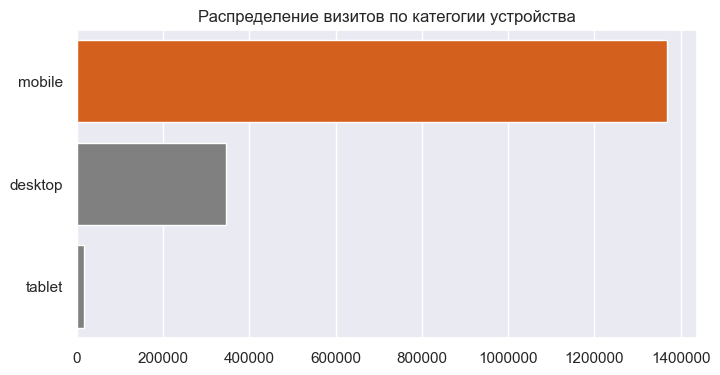

In [65]:
#Распределение визитов по категории устройства

df_bar = df['device_category'].value_counts()
df_bar = df_bar.reset_index()
df_bar.rename(columns = {'count': 'visits'}, inplace = True)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_bar.visits)) else '#f25700' for x in df_bar.visits]
sns.barplot(y = df_bar['device_category'], x = df_bar['visits'], palette=cols)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title('Распределение визитов по категогии устройства')
ax.set(xlabel=None, ylabel=None)
plt.show()

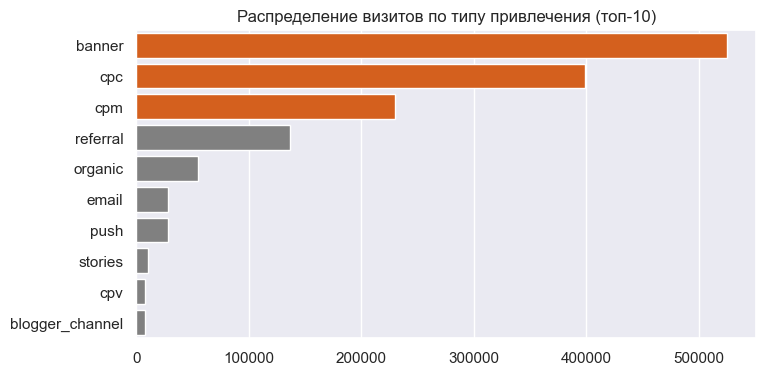

In [72]:
#Распределение визитов по типу привлечения

df_utm = df['utm_medium'].value_counts()
df_utm.drop(labels='(none)', axis=0, inplace=True)
df_utm = df_utm.iloc[0:10]
df_utm =  df_utm.reset_index()
df_utm.rename(columns = {'count': 'visits'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#f25700' if (x in list(df_utm.visits[:3])) else 'grey' for x in df_utm.visits]
sns.barplot(x = df_utm['visits'], y = df_utm['utm_medium'], palette=cols)
ax.set_title('Распределение визитов по типу привлечения (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

Text(0.5, 1.0, 'Количество визитов по дате')

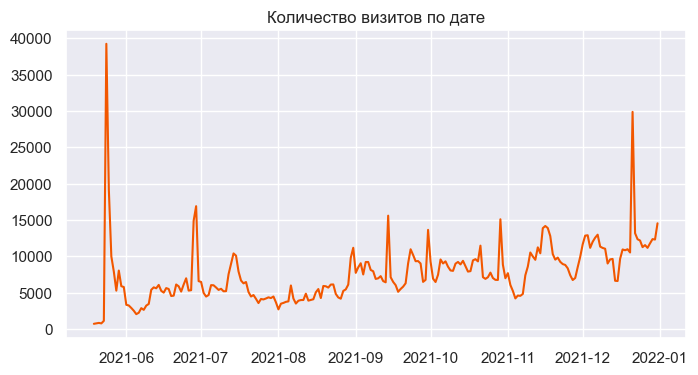

In [73]:
#Количество визитов по датам

stat = df.groupby(['visit_date']).agg({'session_id':'count'})
stat=  stat.rename(columns={'session_id': 'visits'})
stat = stat.reset_index()

fig,ax = plt.subplots()
ax.plot(stat['visit_date'], stat['visits'], color= '#f25700')
ax.set_title('Количество визитов по дате')

## Проверка гипотез

**Нулевая гипотеза**: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события

**Альтернативная гипотеза**: Органический трафик статистически значимо отличается от платного с точки зрения CR

In [138]:
df_organic = df.loc[df['utm_medium'].eq('organic') 
                  | df['utm_medium'].eq('referral')
                  | df['utm_medium'].eq('(none)'),
                                    'target_action'].to_frame()

df_paid = df.loc[df['utm_medium'].ne('organic') 
               & df['utm_medium'].ne('referral')
               & df['utm_medium'].ne('(none)'),
                                 'target_action'].to_frame()

In [139]:
# Для проверки гипотезы о конверсии используем proportions_ztest.

n1 = len(df_organic)
m1 = df_organic.value_counts()[1]

n2 = len(df_paid)
m2 = df_paid.value_counts()[1]

count = np.array([m1, m2])
nobs = np.array([n1, n2])
_ , pval = proportions_ztest(count, nobs)

formatted_p_value = f'{pval:.4f}'
print(f'p-значение: {formatted_p_value}')

if pval < 0.05:
    print('Есть статистически значимая разница')
else:
    print('Статистически значимой разницы нет')

p-значение: 0.0000
Есть статистически значимая разница


Различия в оценках между видами трафика являются статистически значимыми (альтернативная гипотеза)

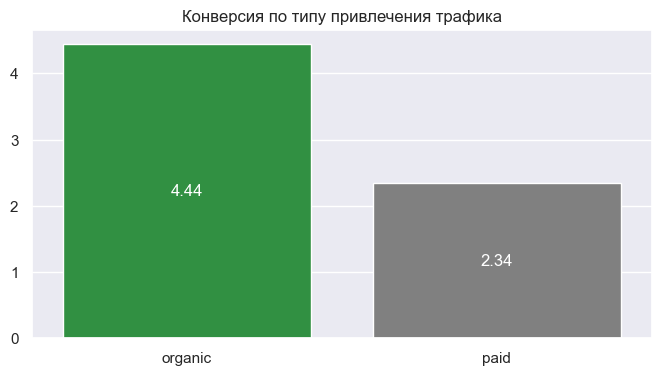

In [140]:
organic_cr = df_organic.value_counts()[1] / len(df_organic) * 100
paid_cr = df_paid.value_counts()[1] / len(df_paid) * 100

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_bar.visits)) else '#21a038' for x in df_bar.visits]
sns.barplot(x = ['organic', 'paid'], y = [organic_cr, paid_cr], palette=cols)
ax.set_title('Конверсия по типу привлечения трафика')
ax.bar_label(ax.containers[0], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.bar_label(ax.containers[1], fontsize=12, label_type='center', color='white', fmt='%.2f')
plt.show()

**Нулевая гипотеза**: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события

**Альтернативная гипотеза**: Трафик с мобильных устройств значимо отличается от трафика с десктопных устройств с точки зрения CR

In [141]:
df_mobile = df.loc[df['device_category'] == 'mobile', 'target_action'].to_frame()
df_desktop = df.loc[df['device_category'] == 'desktop', 'target_action'].to_frame()

In [142]:
n1 = len(df_mobile)
m1 = df_mobile.value_counts()[1]

n2 = len(df_desktop)
m2 = df_desktop.value_counts()[1]

count = np.array([m1, m2])
nobs = np.array([n1, n2])
_ , pval = proportions_ztest(count, nobs)

formatted_p_value = f'{pval:.4f}'
print(f'p-значение: {formatted_p_value}')

if pval < 0.05:
    print('Есть статистически значимая разница')
else:
    print('Статистически значимой разницы нет')

p-значение: 0.0000
Есть статистически значимая разница


Различия в оценках между видами трафика являются статистически значимыми (альтернативная гипотеза)

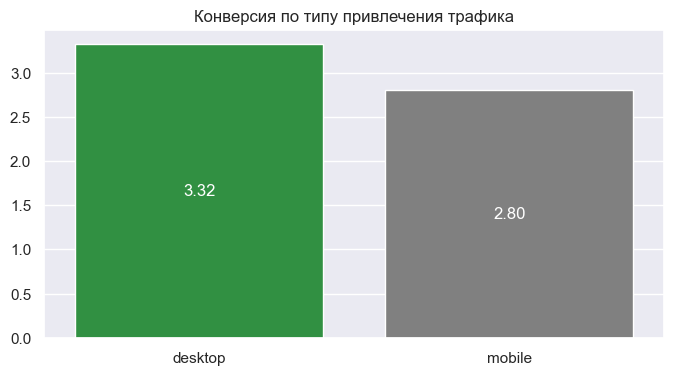

In [143]:
mobile_cr = df_mobile.value_counts()[1] / len(df_mobile) * 100
desktop_cr = df_desktop.value_counts()[1] / len(df_desktop) * 100

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_bar.visits)) else '#21a038' for x in df_bar.visits]
sns.barplot(x = ['desktop', 'mobile'], y = [desktop_cr, mobile_cr], palette=cols)
ax.set_title('Конверсия по типу привлечения трафика')
ax.bar_label(ax.containers[0], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.bar_label(ax.containers[1], fontsize=12, label_type='center', color='white', fmt='%.2f')
plt.show()

**Нулевая гипотеза**: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события

**Альтернативная гипотеза**: Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR

In [144]:
df_capital = df.loc[df['geo_city'].eq('Moscow') 
                  | df['geo_city'].eq('Saint Petersburg'),
                                    'target_action'].to_frame()

df_others = df.loc[df['geo_city'].ne('Moscow') 
                  | df['geo_city'].ne('Saint Petersburg'),
                                    'target_action'].to_frame()

In [145]:
n1 = len(df_capital)
m1 = df_capital.value_counts()[1]

n2 = len(df_others)
m2 = df_others.value_counts()[1]

count = np.array([m1, m2])
nobs = np.array([n1, n2])
_ , pval = proportions_ztest(count, nobs)

formatted_p_value = f'{pval:.4f}'
print(f'p-значение: {formatted_p_value}')

if pval < 0.05:
    print('Есть статистически значимая разница')
else:
    print('Статистически значимой разницы нет')

p-значение: 0.0001
Есть статистически значимая разница


Различия в оценках между видами трафика являются статистически значимыми (альтернативная гипотеза)

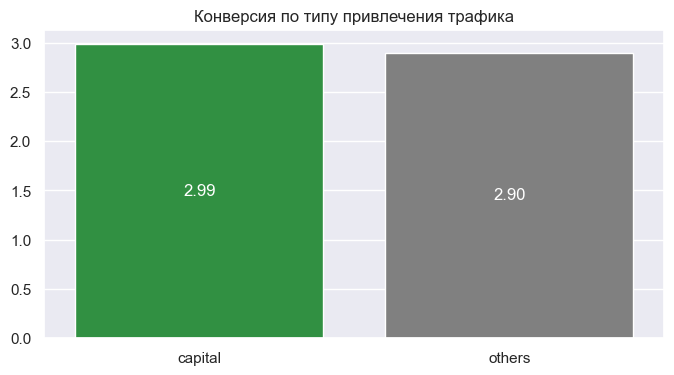

In [151]:
capital_cr = df_capital.value_counts()[1] / len(df_capital) * 100
others_cr = df_others.value_counts()[1] / len(df_others) * 100

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_bar.visits)) else '#21a038' for x in df_bar.visits]
sns.barplot(x = ['capital', 'others'], y = [capital_cr, others_cr], palette=cols)
ax.set_title('Конверсия по типу привлечения трафика')
ax.bar_label(ax.containers[0], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.bar_label(ax.containers[1], fontsize=12, label_type='center', color='white', fmt='%.2f')
plt.show()

## Ответы на вопросы продуктовой команды

Из каких источников, кампаний, устройств, локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [162]:
#1 Самый целевой трафик по объему

# Кампании

df.utm_campaign[df['target_action'] == 1].value_counts().nlargest(20)

utm_campaign
LTuZkdKfxRGVceoWkVyg    19006
LEoPHuyFvzoNfnzGgfcd     9348
gecBYcKZCPMcVYdSSzKP     4545
FTjNLDyTrXaWYgZymFkV     2447
sbJRYgVfvcnqKJNDDYIr      575
XHNUiSKKGTEpSAlaVMFQ      401
SgIUDYUKnyWHVowUOqid      373
LwJZxKuWmvOhPsaCeRjG      285
zxoiLxhuSIFrCeTLQVWZ      270
eimRuUrNhZLAYcwRrNXu      258
YCKgTzTDywjcWyQudGch      235
nSReTmyFtbSjlPrTKoaX      232
RoDitORHdzGfGhNCyEMy      204
hkvDVxqLOzGjGaoNiNzN      184
jqlUOdZBNZYfInQVcZlS      178
bJJuEXRheRIxXEaYIXqM      175
DsqwamlMwRgMTyspCjFR      172
YDIkQmcjRkpdxGbLLtNN      161
MXqmDyetMTICSSitTjWV      157
QdLfySaGXolfTBSNVfHn      151
Name: count, dtype: int64

In [163]:
# Устройства

# Бренд

df.device_brand[(df['target_action'] == 1) & (df.device_brand != '(not set)')].value_counts().nlargest(20)

device_brand
Apple        14467
Samsung      10054
Xiaomi        6592
Huawei        4519
Realme         421
OPPO           396
Vivo           322
Nokia          165
OnePlus        157
Sony           150
ZTE            149
Asus           144
Google         113
Tecno           83
Meizu           74
Lenovo          68
Blackview       68
LG              51
Motorola        47
BQ              41
Name: count, dtype: int64

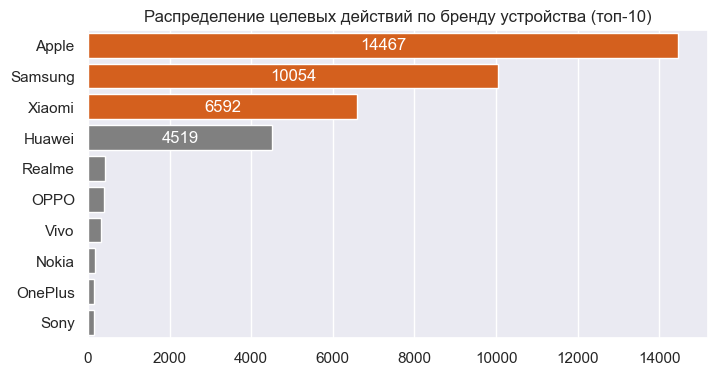

In [177]:
df_device_brand = df.device_brand[(df['target_action'] == 1) & (df.device_brand != '(not set)')].value_counts()
df_device_brand = df_device_brand.iloc[0:10]
df_device_brand =  df_device_brand.reset_index()
df_device_brand.rename(columns = {'count': 'target_actions'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#f25700' if (x in list(df_device_brand['target_actions'][:3])) 
        else 'grey' for x in df_device_brand['target_actions']]
sns.barplot(y = df_device_brand['device_brand'], x = df_device_brand['target_actions'], palette=cols)
ax.set_title('Распределение целевых действий по бренду устройства (топ-10)')
for i in range(4):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.f')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [165]:
# Категория

df.device_category[df['target_action'] == 1].value_counts().nlargest(20)

device_category
mobile     38379
desktop    11513
tablet       422
Name: count, dtype: int64

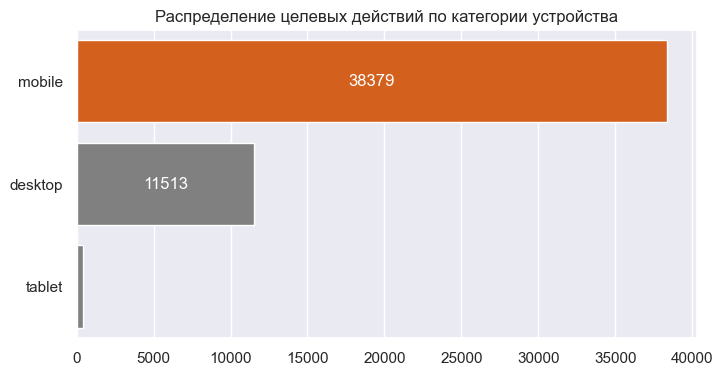

In [179]:
df_device_category = df.device_category[df['target_action'] == 1].value_counts()
df_device_category =  df_device_category.reset_index()
df_device_category.rename(columns = {'count': 'target_actions'}, 
                          inplace = True)

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_device_category['target_actions'])) else '#f25700' 
        for x in df_device_category['target_actions']]
sns.barplot(y = df_device_category['device_category'], x = df_device_category['target_actions'], palette=cols)
ax.set_title('Распределение целевых действий по категории устройства')
for i in range(2):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.f')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [180]:
# Локации

df.geo_city[(df['target_action'] == 1) & (df.geo_city != '(not set)')].value_counts().nlargest(20)

geo_city
Moscow              23629
Saint Petersburg     7113
Kazan                1139
Krasnodar            1081
Yekaterinburg         887
Samara                727
Ufa                   639
Nizhny Novgorod       559
Novosibirsk           509
Tula                  438
Grozny                401
Rostov-on-Don         397
Chelyabinsk           397
Krasnoyarsk           376
Balashikha            359
Irkutsk               327
Sochi                 316
Voronezh              282
Domodedovo            263
Vladivostok           249
Name: count, dtype: int64

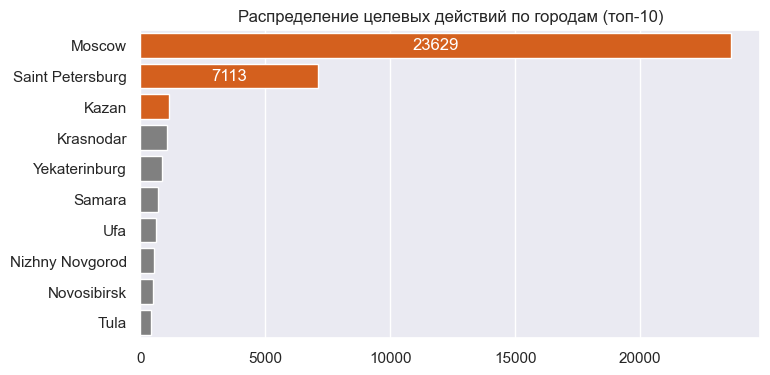

In [187]:
df_geo_city = df.geo_city[(df['target_action'] == 1) & (df.geo_city != '(not set)')].value_counts()
df_geo_city = df_geo_city.iloc[0:10]
df_geo_city =  df_geo_city.reset_index()
df_geo_city.rename(columns = {'count': 'target_actions'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#f25700' if (x in list(df_geo_city['target_actions'][:3])) else 'grey' for x in df_geo_city['target_actions']]
sns.barplot(y = df_geo_city['geo_city'], x = df_geo_city['target_actions'], palette=cols)
for i in range(2):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.f')
ax.set_title('Распределение целевых действий по городам (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [207]:
#2 Самый целевой трафик с точки зрения CR

# Кампании

(df.utm_campaign[df['target_action'] == 1].value_counts().nlargest(10) / 
 df.utm_campaign.value_counts()).nlargest(10)*100

utm_campaign
LTuZkdKfxRGVceoWkVyg    4.493229
gecBYcKZCPMcVYdSSzKP    3.410959
eimRuUrNhZLAYcwRrNXu    3.340238
LEoPHuyFvzoNfnzGgfcd    2.909557
sbJRYgVfvcnqKJNDDYIr    2.883362
SgIUDYUKnyWHVowUOqid    2.363153
zxoiLxhuSIFrCeTLQVWZ    2.206964
LwJZxKuWmvOhPsaCeRjG    1.691796
XHNUiSKKGTEpSAlaVMFQ    1.688421
FTjNLDyTrXaWYgZymFkV    1.041498
Name: count, dtype: float64

In [208]:
# Устройства

# Бренд
(df.device_brand[(df['target_action'] == 1) & 
                 (df.device_brand != '(not set)')].value_counts().nlargest(10) 
 / df.device_brand.value_counts()).nlargest(10)*100

device_brand
Samsung    3.226148
OPPO       3.099804
Vivo       2.920370
Apple      2.873099
Huawei     2.599696
Sony       2.456600
Xiaomi     2.448273
Nokia      2.403846
Realme     2.348544
OnePlus    1.684188
Name: count, dtype: float64

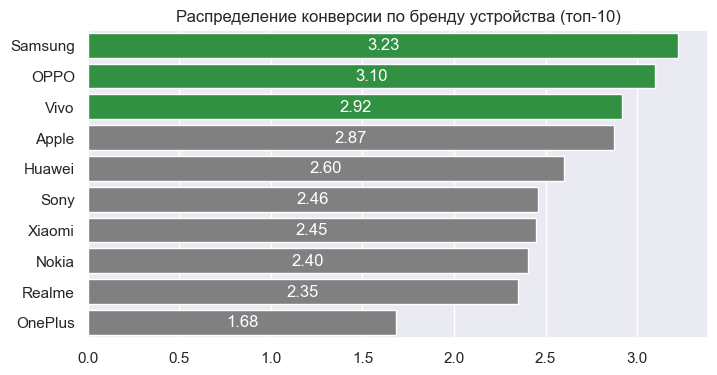

In [217]:
df_device_brand_conv = (df.device_brand[(df['target_action'] == 1) 
                        & (df.device_brand != '(not set)')].value_counts().nlargest(10) 
                        / df.device_brand.value_counts()).nlargest(10)*100
df_device_brand_conv =  df_device_brand_conv.reset_index()
df_device_brand_conv.rename(columns = {'count': 'conversion'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#21a038' if (x in list(df_device_brand_conv['conversion'][:3])) 
        else 'grey' for x in df_device_brand_conv['conversion']]
sns.barplot(y = df_device_brand_conv['device_brand'], x = df_device_brand_conv['conversion'], palette=cols)
for i in range(10):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.set_title('Распределение конверсии по бренду устройства (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [210]:
# Категория
(df.device_category[df['target_action'] == 1].value_counts() /
  df.device_category.value_counts()).nlargest(10)*100

device_category
desktop    3.318910
mobile     2.804091
tablet     2.527552
Name: count, dtype: float64

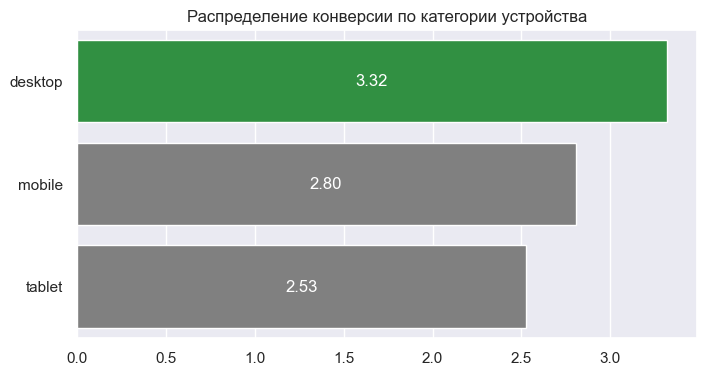

In [219]:
df_device_category_conv = (df.device_category[df['target_action'] == 1].value_counts() 
                      / df.device_category.value_counts()).nlargest(10)*100
df_device_category_conv =  df_device_category_conv.reset_index()
df_device_category_conv.rename(columns = {'count': 'conversion'}, inplace = True)

fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_device_category['target_actions'])) else '#21a038' 
        for x in df_device_category['target_actions']]
sns.barplot(y = df_device_category_conv['device_category'], 
            x = df_device_category_conv['conversion'],  palette=cols)
for i in range(3):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.set_title('Распределение конверсии по категории устройства')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [220]:
# Локации

(df.geo_city[(df['target_action'] == 1) & (df.geo_city != '(not set)')].value_counts().nlargest(10) 
 / df.geo_city.value_counts()).nlargest(10)*100

geo_city
Kazan               4.113547
Krasnodar           3.572373
Ufa                 3.150422
Moscow              3.146640
Samara              3.102462
Tula                2.964668
Nizhny Novgorod     2.689828
Yekaterinburg       2.643421
Saint Petersburg    2.554939
Novosibirsk         2.530450
Name: count, dtype: float64

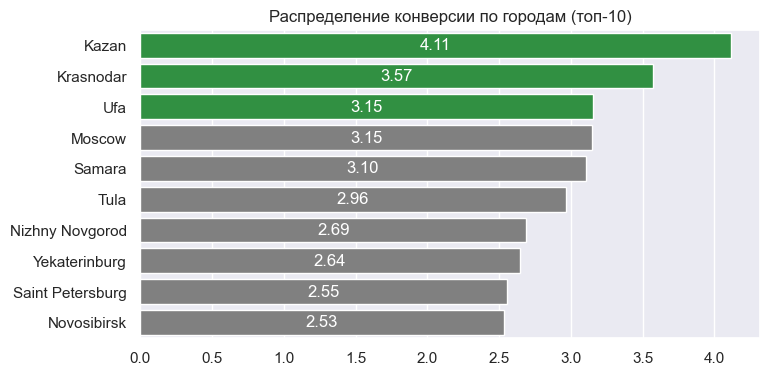

In [225]:
df_geo_city_conv = (df.geo_city[(df['target_action'] == 1) 
                        & (df.geo_city != '(not set)')].value_counts().nlargest(10) 
                        / df.geo_city.value_counts()).nlargest(10)*100
df_geo_city_conv =  df_geo_city_conv.reset_index()
df_geo_city_conv.rename(columns = {'count': 'conversion'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#21a038' if (x in list(df_geo_city_conv['conversion'][:3])) 
        else 'grey' for x in df_geo_city_conv['conversion']]
sns.barplot(y = df_geo_city_conv['geo_city'], x = df_geo_city_conv['conversion'], palette=cols)
for i in range(10):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.set_title('Распределение конверсии по городам (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [226]:
# Наибольший спрос

df.model[(df['target_action'] == 1) & (df.model != 'other')].value_counts().nlargest(20)

model
skoda rapid                 1925
lada-vaz vesta              1622
volkswagen polo             1437
skoda karoq                  487
mercedes-benz e-klasse       436
kia rio                      420
toyota camry                 361
renault logan                332
nissan qashqai               322
kia seltos                   298
skoda octavia                273
nissan x-trail               221
kia sorento                  190
renault duster               177
haval jolion                 163
mercedes-benz gla-klasse     107
bmw 5-serii                  103
volvo s90                    103
volkswagen tiguan             98
bmw x5                        97
Name: count, dtype: int64

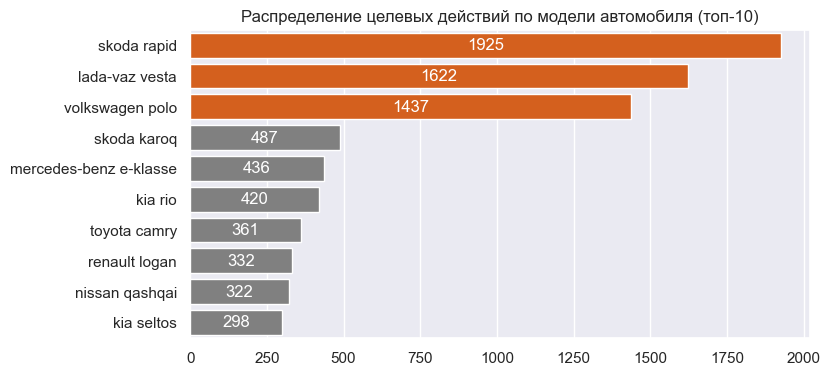

In [231]:
df_model = df.model[(df['target_action'] == 1) & (df.model != 'other')].value_counts()
df_model = df_model.iloc[0:10]
df_model = df_model.reset_index()
df_model.rename(columns = {'count': 'target_actions'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#f25700' if (x in list(df_model['target_actions'][:3])) else 'grey' for x in df_model['target_actions']]
sns.barplot(y = df_model['model'], x = df_model['target_actions'], palette=cols)
for i in range(10):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.f')
ax.set_title('Распределение целевых действий по модели автомобиля (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [232]:
# Conversion rate

(df.model[(df['target_action'] == 1) & (df.model != 'other')].value_counts().nlargest(10) 
 / df.model.value_counts()).nlargest(10)*100

model
toyota camry              9.239826
kia rio                   8.199922
kia seltos                7.730220
volkswagen polo           7.330511
renault logan             6.508528
skoda rapid               6.079459
lada-vaz vesta            5.976639
skoda karoq               4.158839
mercedes-benz e-klasse    3.054291
nissan qashqai            2.919311
Name: count, dtype: float64

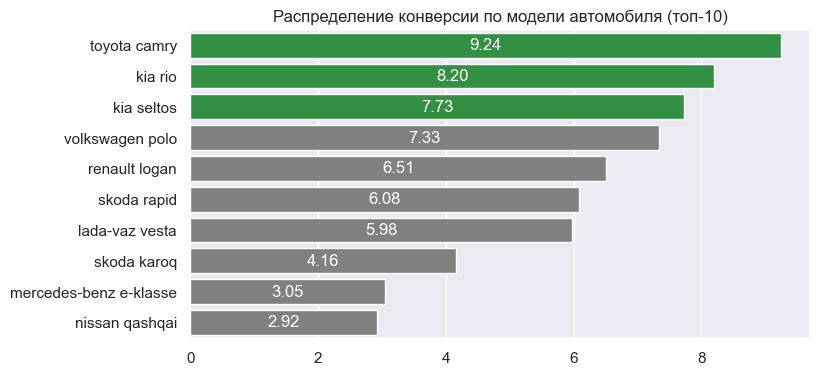

In [235]:
df_model_conv = (df.model[(df['target_action'] == 1) 
                        & (df.model != 'other')].value_counts().nlargest(10) 
                        / df.model.value_counts()).nlargest(10)*100
df_model_conv =  df_model_conv.reset_index()
df_model_conv.rename(columns = {'count': 'conversion'}, inplace = True)

fig,ax = plt.subplots()
cols = ['#21a038' if (x in list(df_model_conv['conversion'][:3])) 
        else 'grey' for x in df_model_conv['conversion']]
sns.barplot(y = df_model_conv['model'], x = df_model_conv['conversion'], palette=cols)
for i in range(10):
    ax.bar_label(ax.containers[i], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.set_title('Распределение конверсии по модели автомобиля (топ-10)')
ax.set(xlabel=None, ylabel=None)
plt.show()

Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [236]:
df_source= df.loc[df['utm_source'].eq('QxAxdyPLuQMEcrdZWdWb') 
                | df['utm_source'].eq('MvfHsxITijuriZxsqZqt')
                | df['utm_source'].eq('ISrKoXQCxqqYvAZICvjs')
                | df['utm_source'].eq('IZEXUFLARCUMynmHNBGo')
                | df['utm_source'].eq('PlbkrSYoHuZBWfYjYnfw')
                | df['utm_source'].eq('gVRrcxiDQubJiljoTbGm'),
                                    'target_action'].to_frame()

In [237]:
df_source.target_action.value_counts()

target_action
0    252259
1      4021
Name: count, dtype: int64

In [238]:
social_cr = df_source.target_action.value_counts()[1] / (df_source.target_action.value_counts()[1] 
                                             + df_source.target_action.value_counts()[0]) * 100

average_cr = df.target_action.value_counts()[1] / (df.target_action.value_counts()[1] 
                                             + df.target_action.value_counts()[0]) * 100

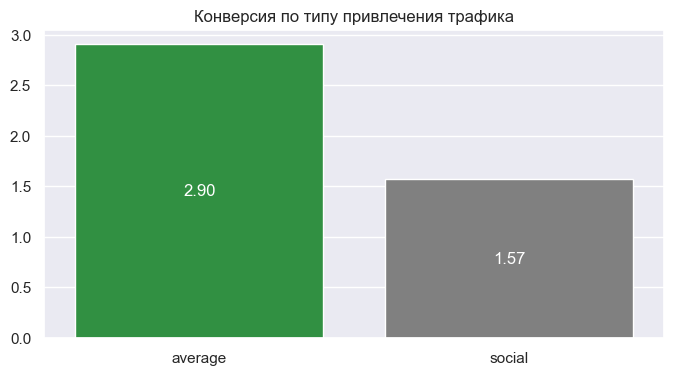

In [241]:
fig,ax = plt.subplots()
cols = ['grey' if (x < max(df_bar.visits)) else '#21a038' for x in df_bar.visits]
sns.barplot(x = ['average', 'social'], y = [average_cr, social_cr], palette=cols)
ax.set_title('Конверсия по типу привлечения трафика')
ax.bar_label(ax.containers[0], fontsize=12, label_type='center', color='white', fmt='%.2f')
ax.bar_label(ax.containers[1], fontsize=12, label_type='center', color='white', fmt='%.2f')
plt.show()

Вывод: не стоит, т.к показатель конверсии из визита значительно ниже средней конверсии